In [76]:
# !conda install graphviz

import pandas as pd
import numpy as np

# data 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
import graphviz

# data split
from sklearn.model_selection import train_test_split
# Scale 변환
from sklearn.preprocessing import StandardScaler

# Linear Regression
import statsmodels.formula.api as smf
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# Random Forest
from sklearn.ensemble import RandomForestRegressor
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# 평가 함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
# !ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

import matplotlib
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 전체 적용
matplotlib.rc("font", family = "NanumGothicCoding")
import warnings
warnings.filterwarnings("ignore")

Font directories:
	/home/piai/anaconda3/fonts
	/home/piai/.local/share/fonts
	/usr/share/ubuntu/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/var/lib/snapd/desktop/fonts
	/home/piai/.fonts
	/usr/share/fonts/X11
	/usr/share/fonts/cMap
	/usr/share/fonts/cmap
	/usr/share/fonts/opentype
	/usr/share/fonts/truetype
	/usr/share/fonts/type1
	/usr/share/fonts/X11/Type1
	/usr/share/fonts/X11/encodings
	/usr/share/fonts/X11/misc
	/usr/share/fonts/X11/util
	/usr/share/fonts/cmap/adobe-cns1
	/usr/share/fonts/cmap/adobe-gb1
	/usr/share/fonts/cmap/adobe-japan1
	/usr/share/fonts/cmap/adobe-japan2
	/usr/share/fonts/cmap/adobe-korea1
	/usr/share/fonts/opentype/malayalam
	/usr/share/fonts/opentype/noto
	/usr/share/fonts/truetype/Gargi
	/usr/share/fonts/truetype/Gubbi
	/usr/share/fonts/truetype/Nakula
	/usr/share/fonts/truetype/Navilu
	/usr/share/fonts/truetype/Sahadeva
	/usr/share/fonts/truetype/Sarai
	/usr/share/fonts/truetype/abyssinica
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/d

## Data 확인 및 전처리 과정

In [77]:
df = pd.read_csv("/home/piai/data/2. Big Data 분석/SCALE불량.csv", encoding= 'euc-kr')
# df_Tsteel = pd.read_csv("/home/piai/Downloads/df_Tsteel.csv")
# df_Csteel = pd.read_csv("/home/piai/Downloads/df_Csteel.csv")

In [78]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [79]:
df_Csteel = df[df['steel_kind'] == 'C']
df_Tsteel = df[df['steel_kind'] == 'T']

In [80]:
# df_Tsteel.info()

In [81]:
# df_Csteel

In [82]:
df['date'] = df['rolling_date'].str[:2]

Text(0, 0.5, '갯수')

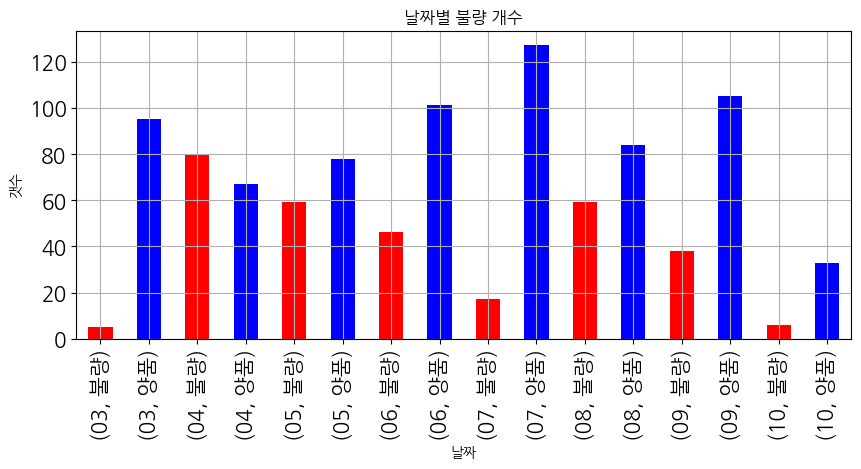

In [83]:
import matplotlib.pyplot as plt
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# 나눔고딕 폰트 전체 적용
matplotlib.rc("font", family = "NanumGothic")
import warnings
warnings.filterwarnings("ignore")


dummy_df = pd.get_dummies(df['scale'])
df = pd.concat([df, dummy_df], axis=1)

count_by_scale = df.groupby(['date','scale']).size()

# 막대 그래프 그리기
count_by_scale.plot.bar(stacked=True, grid=True, figsize=(10, 4), fontsize=15, color=['red', 'blue'])
plt.title('날짜별 불량 개수')
plt.xlabel('날짜')
plt.ylabel('갯수')

# plt.plot(df['date'], df['scale'], marker='o')

# plt.show()

Text(0, 0.5, '불량 수')

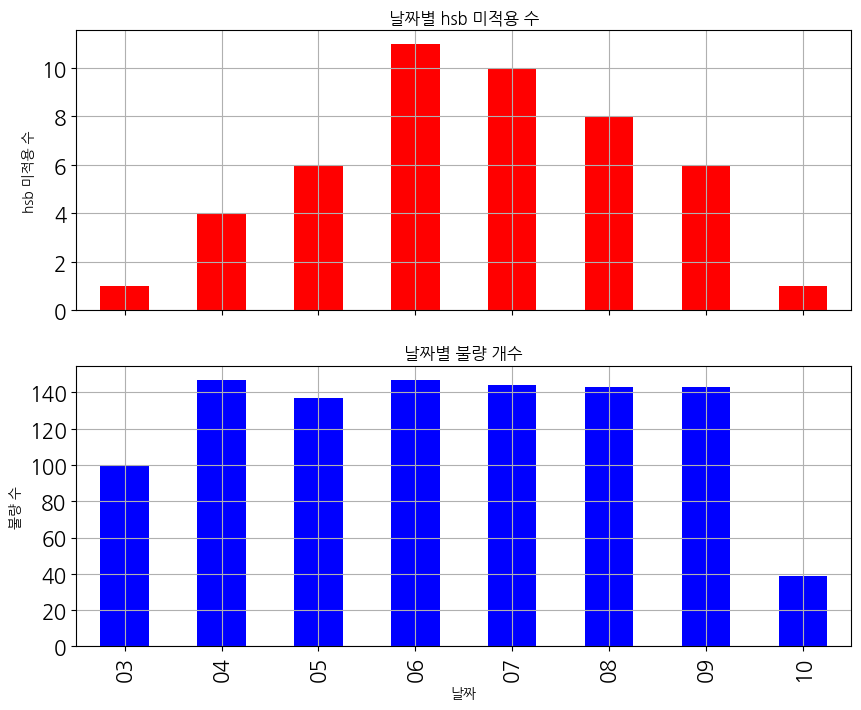

In [84]:
filtered_df1 = df[df['hsb'] != '적용']
count1 = filtered_df1.groupby('date').size()

# Filtered data for scale '양호'
filtered_df2 = df[df['scale'] != '양호']
count2 = filtered_df2.groupby('date').size()

# Create a figure and two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot for hsb
count1.plot.bar(ax=ax1, grid=True, fontsize=15, color='red')
ax1.set_title('날짜별 hsb 미적용 수')
ax1.set_ylabel('hsb 미적용 수')

# Plot for scale
count2.plot.bar(ax=ax2, stacked=True, grid=True, fontsize=15, color=['blue'])
ax2.set_title('날짜별 불량 개수')
ax2.set_xlabel('날짜')
ax2.set_ylabel('불량 수')

In [85]:
df['hour'] = df['rolling_date'].str[10:12]
df['hour']

0      07
1      07
2      07
3      07
4      07
       ..
995    05
996    05
997    05
998    06
999    06
Name: hour, Length: 1000, dtype: object

In [86]:
df['day'] = df['rolling_date'].str[:2]
df['day']

0      03
1      03
2      03
3      03
4      03
       ..
995    10
996    10
997    10
998    10
999    10
Name: day, Length: 1000, dtype: object

Text(0, 0.5, '갯수')

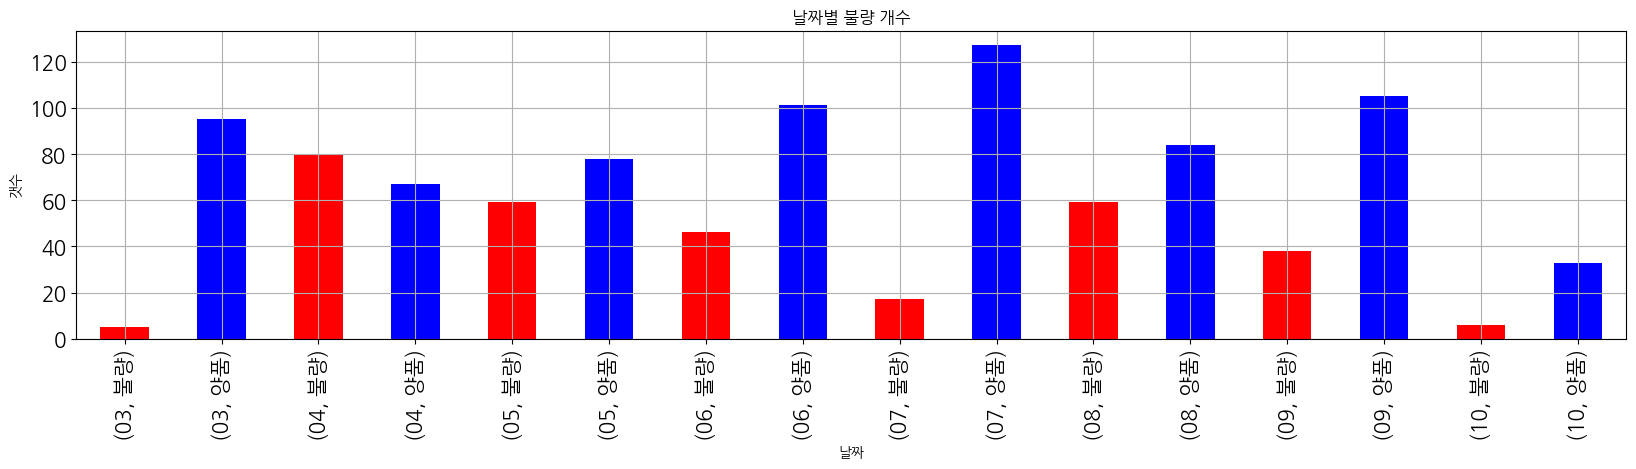

In [126]:
count_by_scale = df.groupby(['day','scale']).size()

# 막대 그래프 그리기
count_by_scale.plot.bar(stacked=True, grid=True, figsize=(20, 4), fontsize=15, color=['red', 'blue'])
plt.title('날짜별 불량 개수')
plt.xlabel('날짜')

plt.ylabel('갯수')

In [ ]:
#날짜별로 불량 개수가 삼각파 형태를 띄고 있다. 불량 원인과 관련이 있을 수도 있다.

Text(0, 0.5, '갯수')

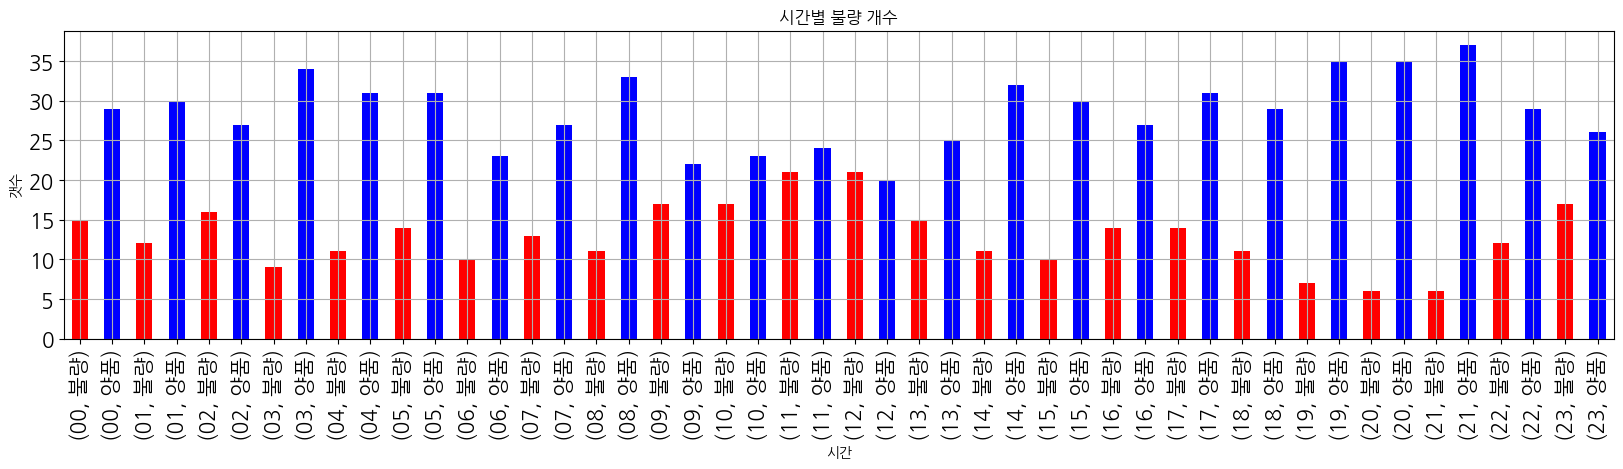

In [125]:
count_by_scale = df.groupby(['hour','scale']).size()

# 막대 그래프 그리기
count_by_scale.plot.bar(stacked=True, grid=True, figsize=(20, 4), fontsize=15, color=['red', 'blue'])
plt.title('시간별 불량 개수')
plt.xlabel('시간')

plt.ylabel('갯수')

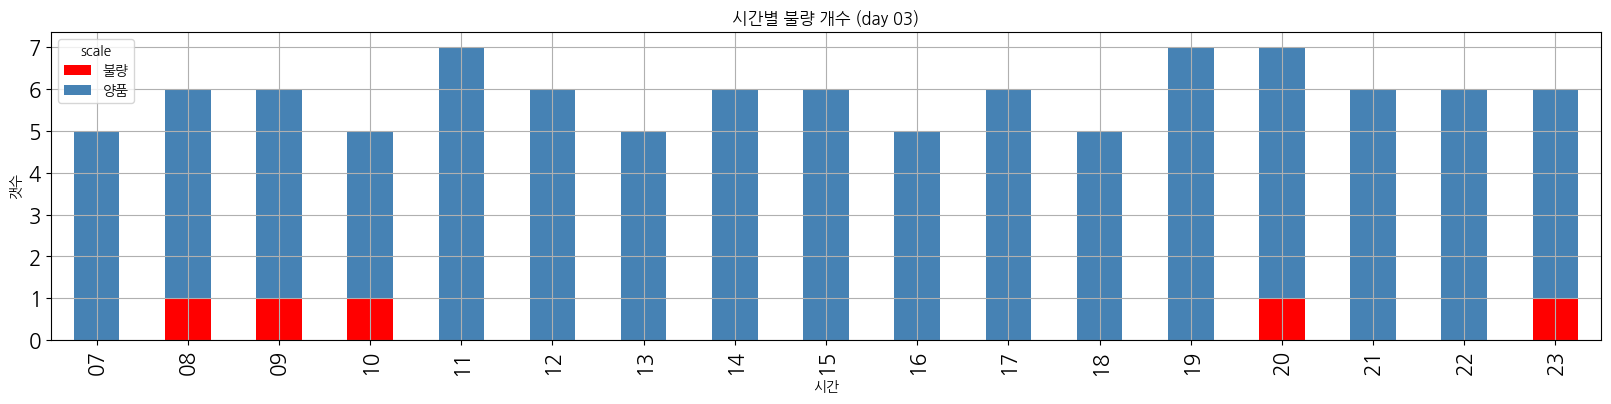

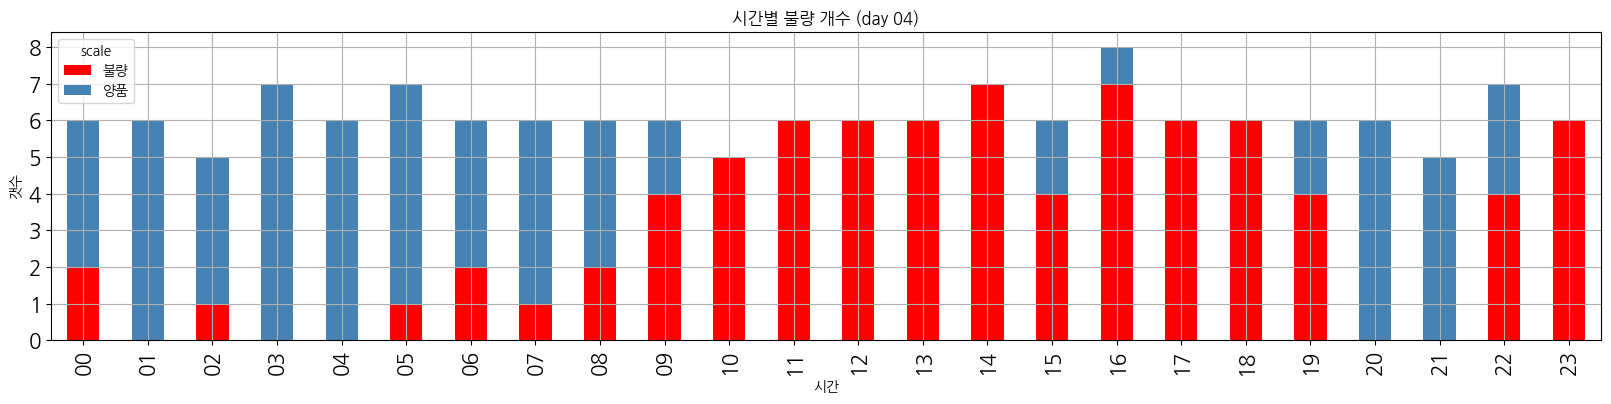

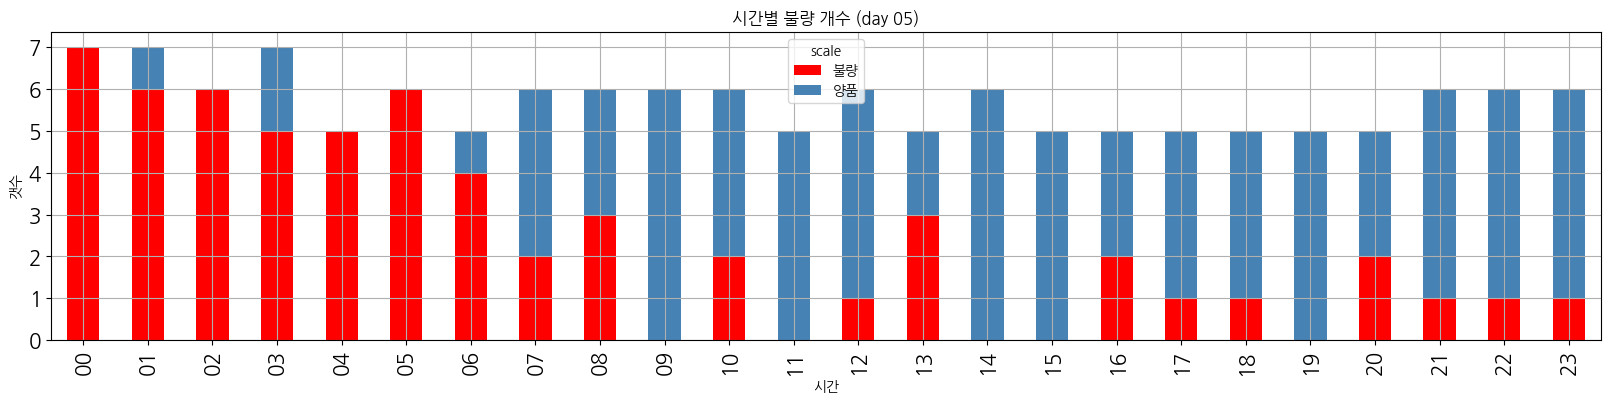

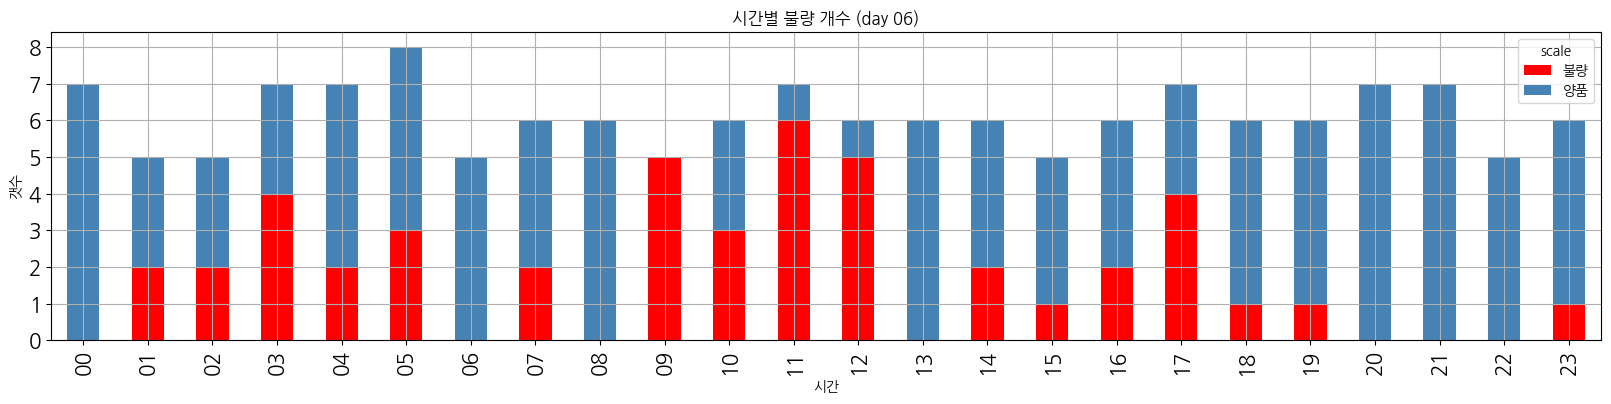

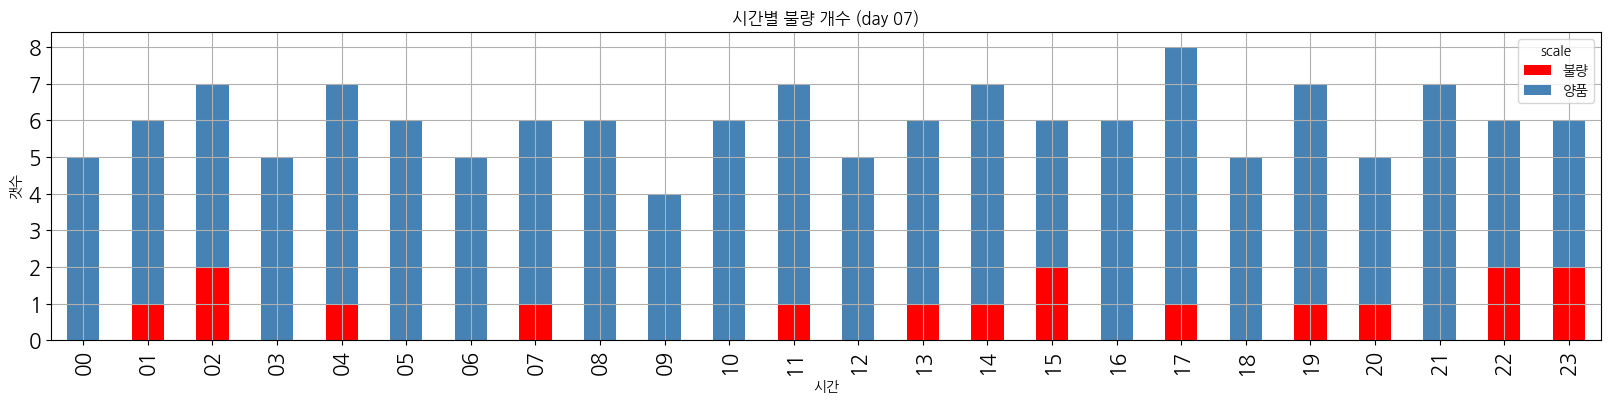

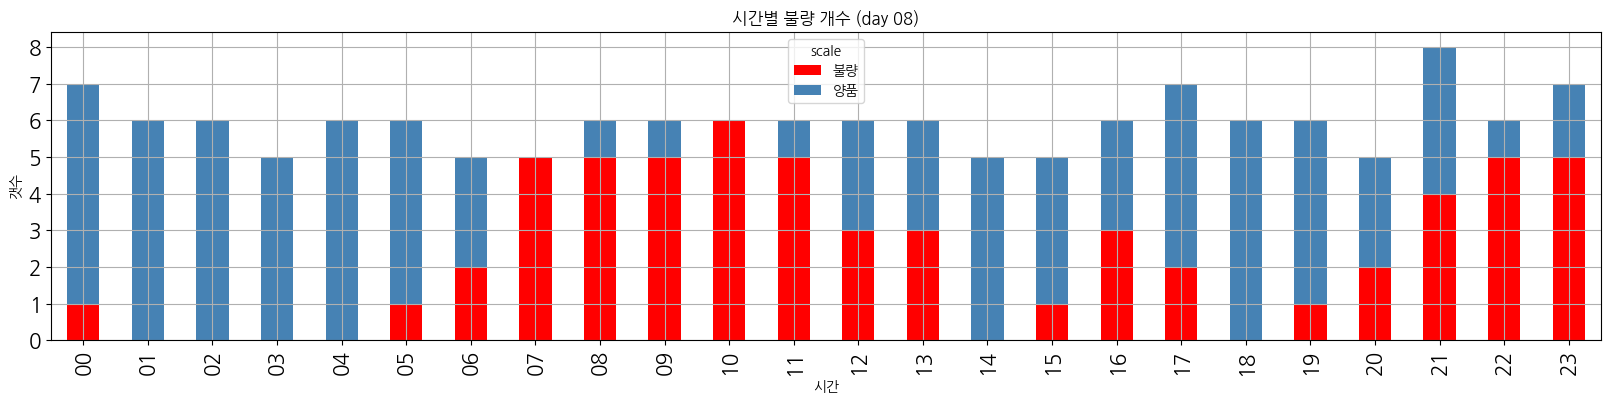

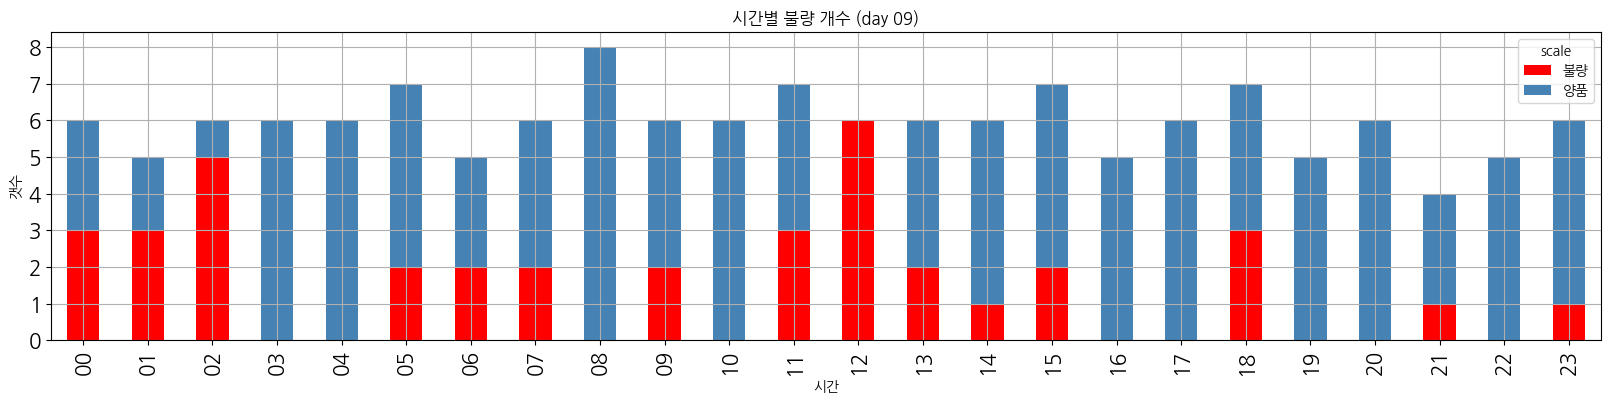

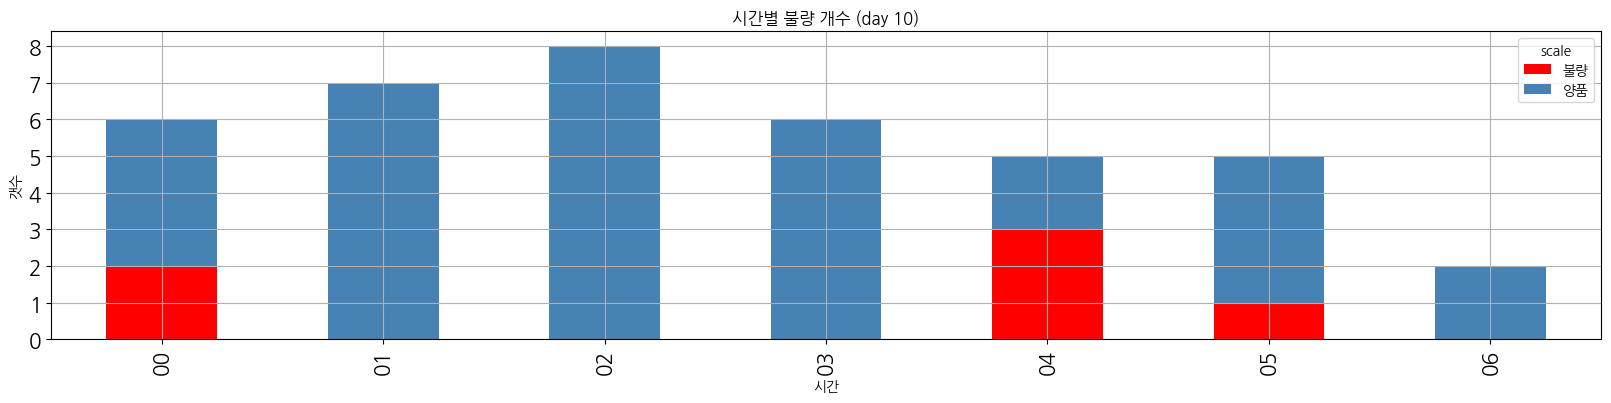

In [88]:
dates = ['03', '04', '05', '06', '07', '08', '09', '10']

for date in dates:
    # Filter the DataFrame for the current date
    df_date = df[df['day'] == date]
    
    # Group by 'hour' and 'scale' for the current date
    count_by_scale = df_date.groupby(['hour', 'scale']).size().unstack(fill_value=0)
    
    # Plot the bar graph for the current date
    count_by_scale.plot.bar(stacked=True, grid=True, figsize=(20, 4), fontsize=15, color=['red', 'steelblue'])
    
    # Set title and labels
    plt.title(f'시간별 불량 개수 (day {date})')
    plt.xlabel('시간')
    plt.ylabel('갯수'
# 특정 시간대별로 불량이 경향성을 지니는 것처럼 보인다.

In [89]:
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date,불량,양품,hour,day
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1133,TMCP(온도제어),934,8,1조,03,0,1,07,03
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1135,TMCP(온도제어),937,8,1조,03,0,1,07,03
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1121,TMCP(온도제어),889,8,1조,03,0,1,07,03
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1127,TMCP(온도제어),885,8,1조,03,0,1,07,03
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1128,TMCP(온도제어),873,8,1조,03,0,1,07,03


In [ ]:
# 날짜&시간별로 불량이 특정한 경향성을 지니는 것처럼 보인다.

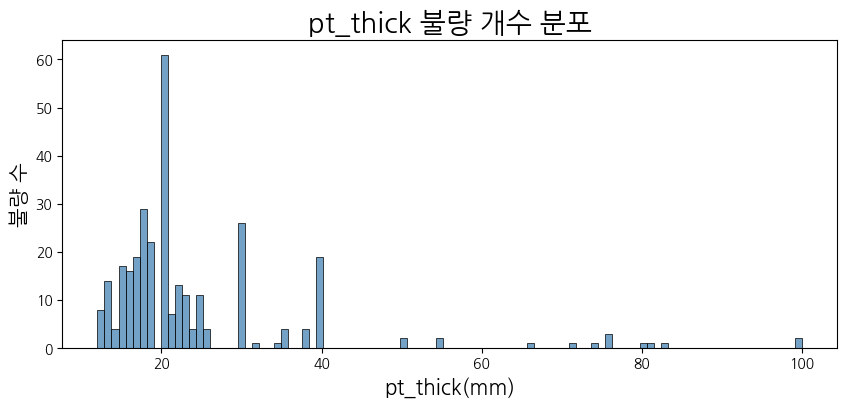

In [90]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'pt_thick'], bins=100, kde=False, color='steelblue')

plt.title('pt_thick 불량 개수 분포', fontsize=20)
plt.xlabel('pt_thick(mm)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

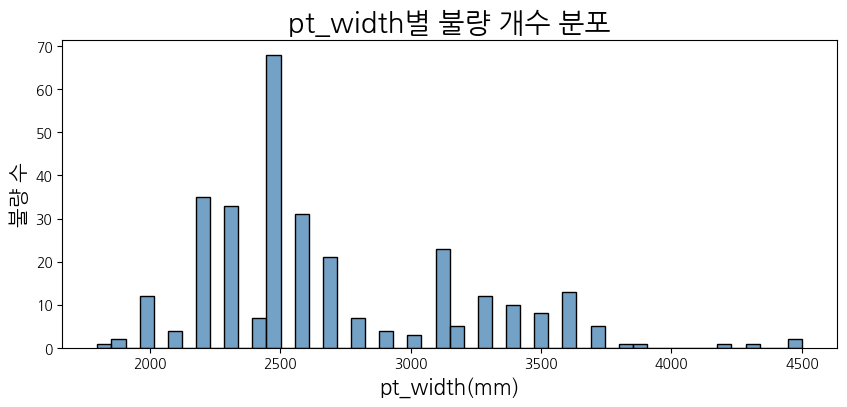

In [91]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'pt_width'], bins=50, kde=False, color='steelblue')

plt.title('pt_width별 불량 개수 분포', fontsize=20)
plt.xlabel('pt_width(mm)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

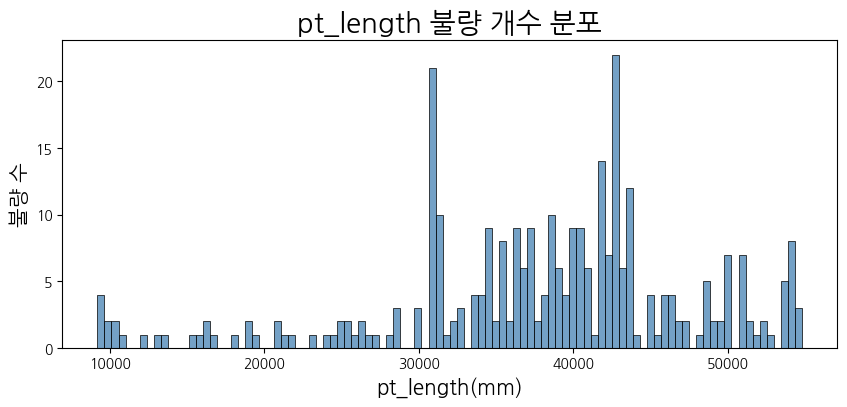

In [92]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'pt_length'], bins=100, kde=False, color='steelblue')

plt.title('pt_length 불량 개수 분포', fontsize=20)
plt.xlabel('pt_length(mm)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

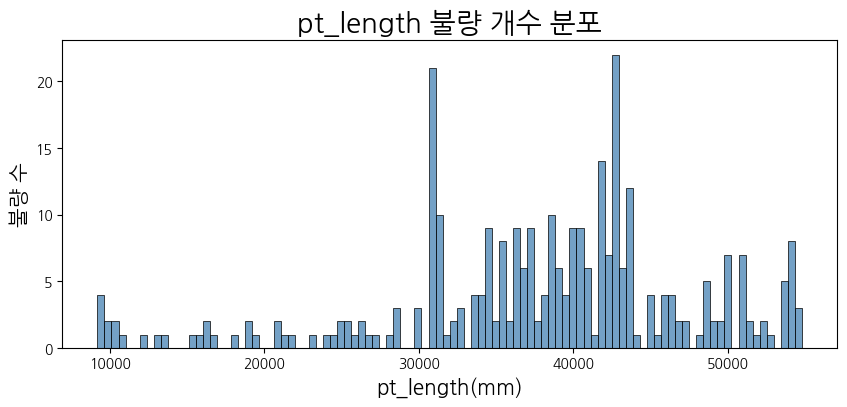

In [93]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'pt_length'], bins=100, kde=False, color='steelblue')

plt.title('pt_length 불량 개수 분포', fontsize=20)
plt.xlabel('pt_length(mm)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

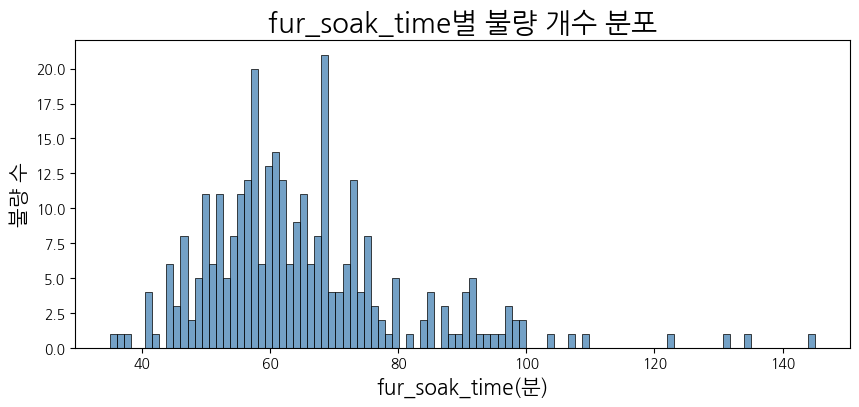

In [94]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'fur_soak_time'], bins=100, kde=False, color='steelblue')

plt.title('fur_soak_time별 불량 개수 분포', fontsize=20)
plt.xlabel('fur_soak_time(분)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

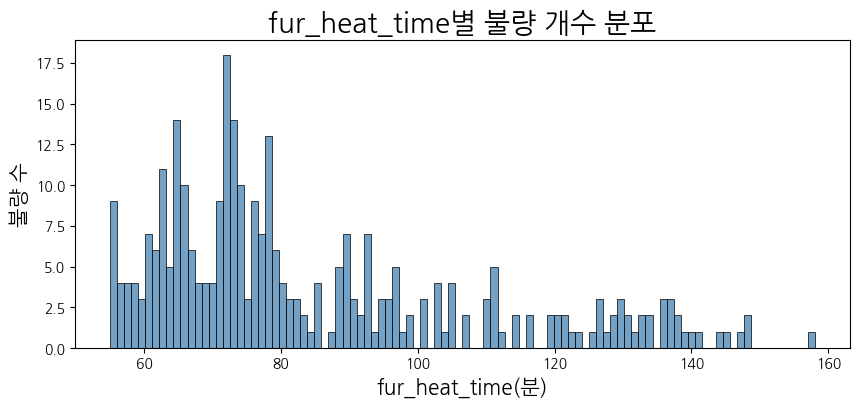

In [95]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'fur_heat_time'], bins=100, kde=False, color='steelblue')

plt.title('fur_heat_time별 불량 개수 분포', fontsize=20)
plt.xlabel('fur_heat_time(분)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

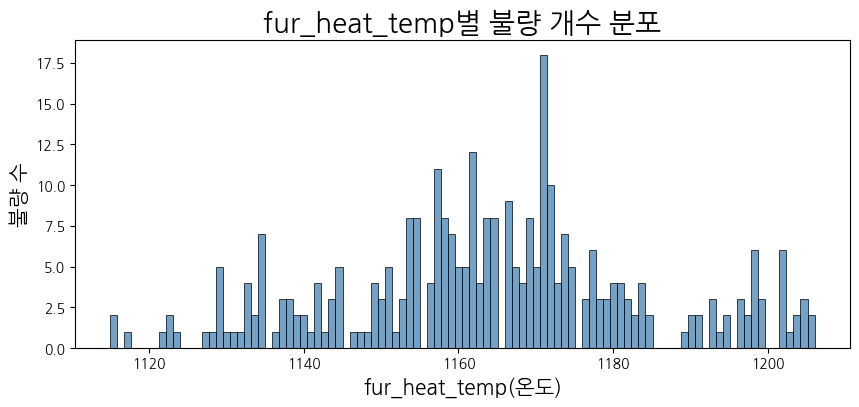

In [96]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'fur_heat_temp'], bins=100, kde=False, color='steelblue')

plt.title('fur_heat_temp별 불량 개수 분포', fontsize=20)
plt.xlabel('fur_heat_temp(온도)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

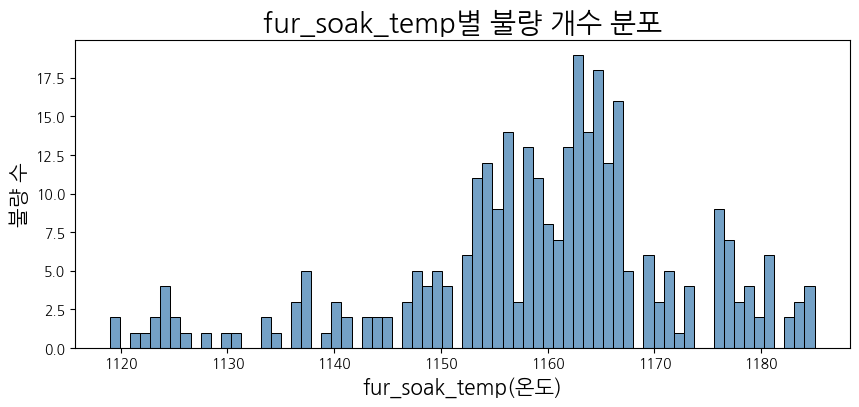

In [97]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'fur_soak_temp'], bins=70, kde=False, color='steelblue')

plt.title('fur_soak_temp별 불량 개수 분포', fontsize=20)
plt.xlabel('fur_soak_temp(온도)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

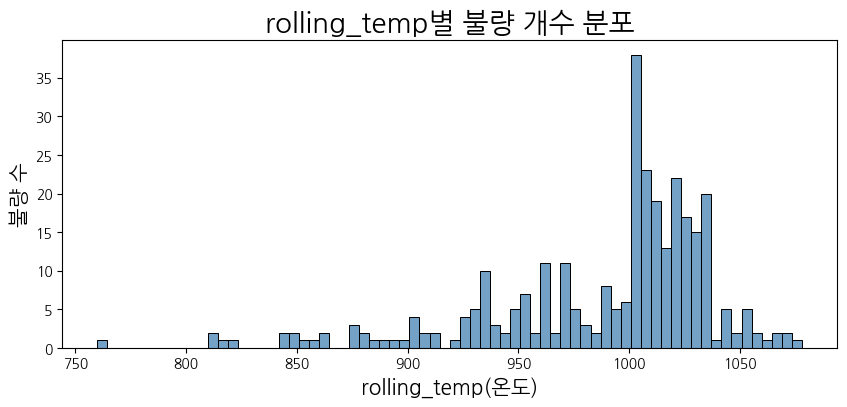

In [98]:
plt.figure(figsize=(10, 4))

sns.histplot(df.loc[df['scale'] != '양품', 'rolling_temp'], bins=70, kde=False, color='steelblue')

plt.title('rolling_temp별 불량 개수 분포', fontsize=20)
plt.xlabel('rolling_temp(온도)', fontsize=15)
plt.ylabel('불량 수', fontsize=15)

plt.show()

# 연속형 변주의 분포

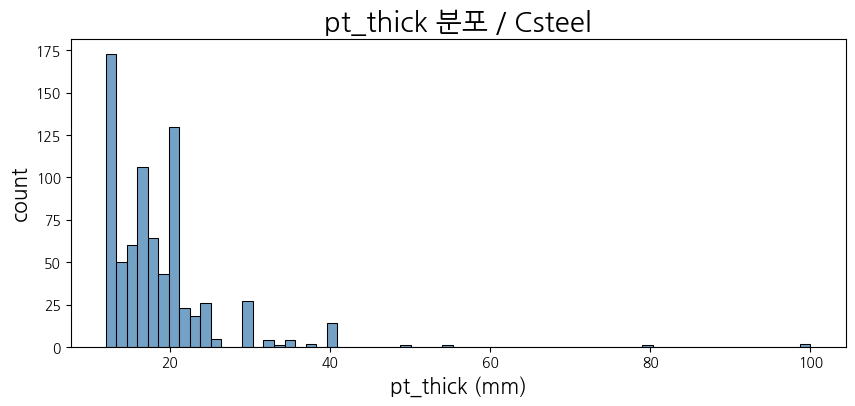

In [99]:

plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['pt_thick'], color='steelblue')

plt.title('pt_thick 분포 / Csteel', fontsize=20)
plt.xlabel('pt_thick (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

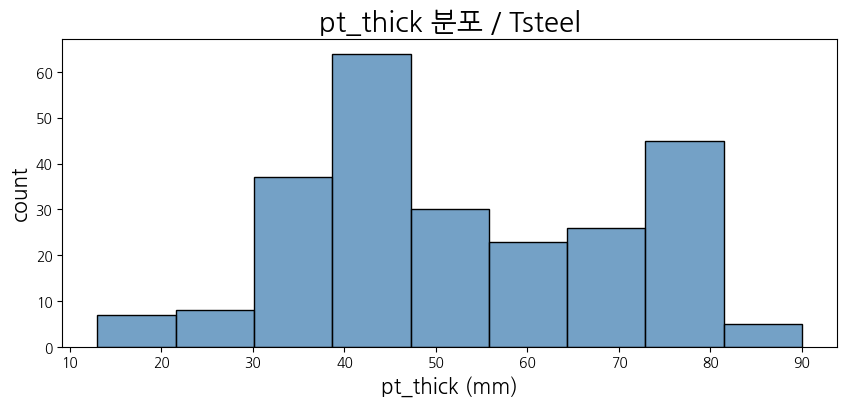

In [100]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['pt_thick'], color='steelblue')

plt.title('pt_thick 분포 / Tsteel', fontsize=20)
plt.xlabel('pt_thick (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

#thick이 특정 구간에 집중되어있음.

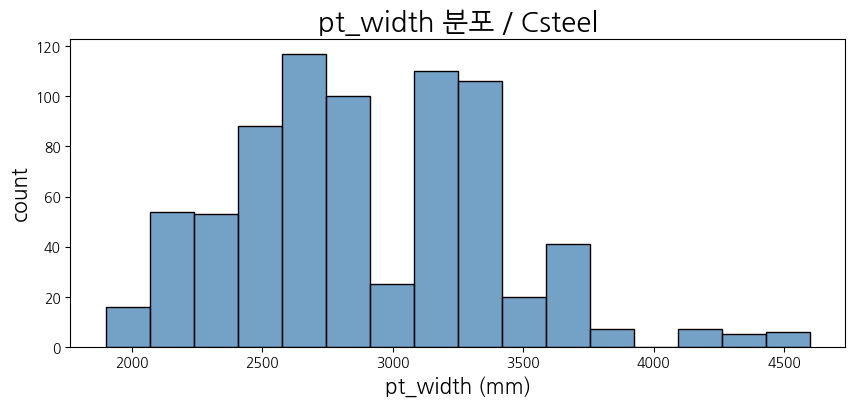

In [101]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['pt_width'], color='steelblue')

plt.title('pt_width 분포 / Csteel', fontsize=20)
plt.xlabel('pt_width (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

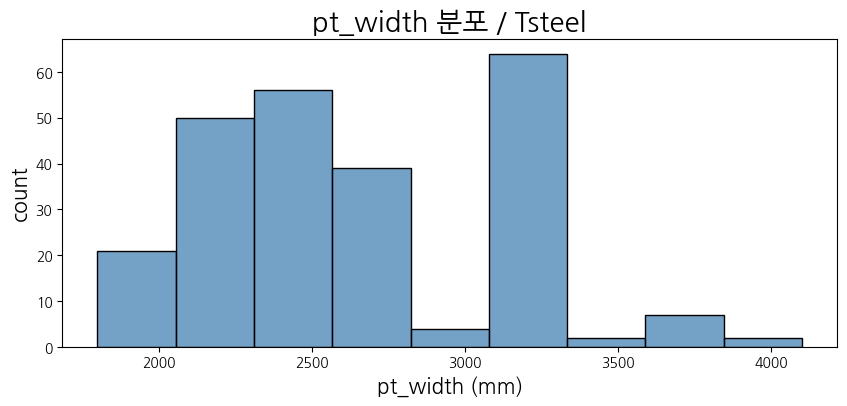

In [102]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['pt_width'], color='steelblue')

plt.title('pt_width 분포 / Tsteel', fontsize=20)
plt.xlabel('pt_width (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

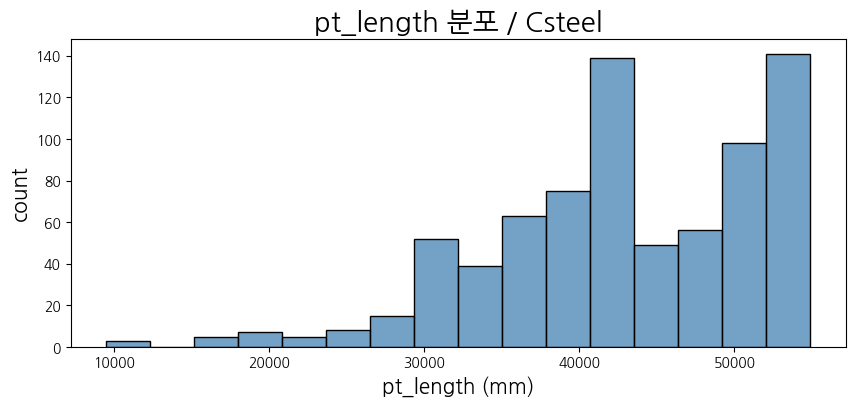

In [103]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['pt_length'], color='steelblue')

plt.title('pt_length 분포 / Csteel', fontsize=20)
plt.xlabel('pt_length (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

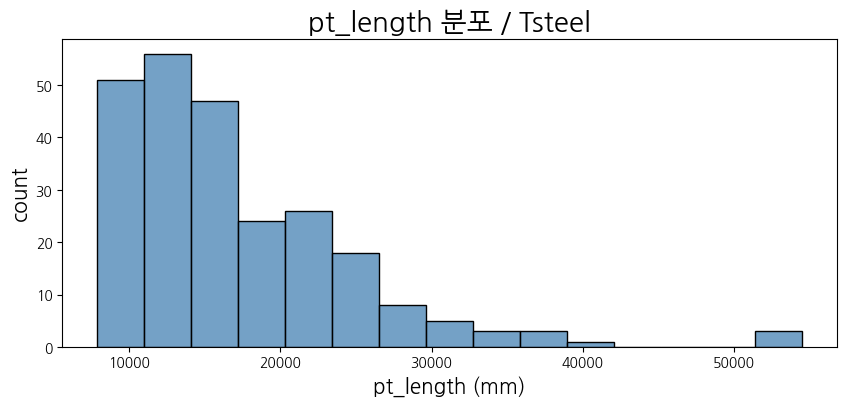

In [104]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['pt_length'], color='steelblue')

plt.title('pt_length 분포 / Tsteel', fontsize=20)
plt.xlabel('pt_length (mm)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

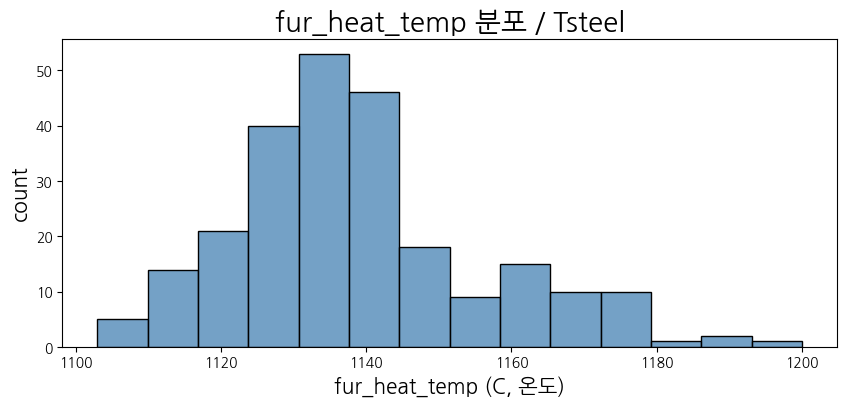

In [105]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['fur_heat_temp'], color='steelblue')

plt.title('fur_heat_temp 분포 / Tsteel', fontsize=20)
plt.xlabel('fur_heat_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

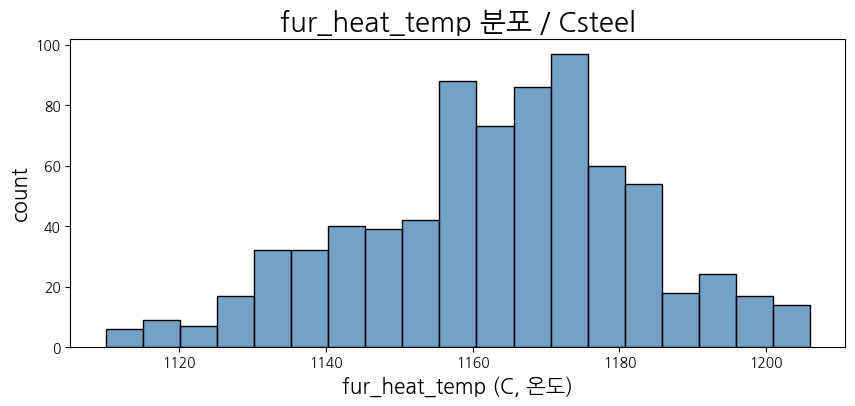

In [106]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['fur_heat_temp'], color='steelblue')

plt.title('fur_heat_temp 분포 / Csteel', fontsize=20)
plt.xlabel('fur_heat_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

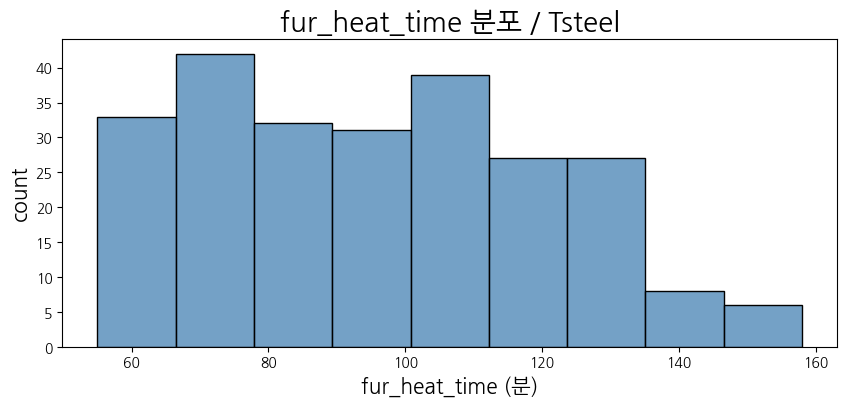

In [107]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['fur_heat_time'], color='steelblue')

plt.title('fur_heat_time 분포 / Tsteel', fontsize=20)
plt.xlabel('fur_heat_time (분)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

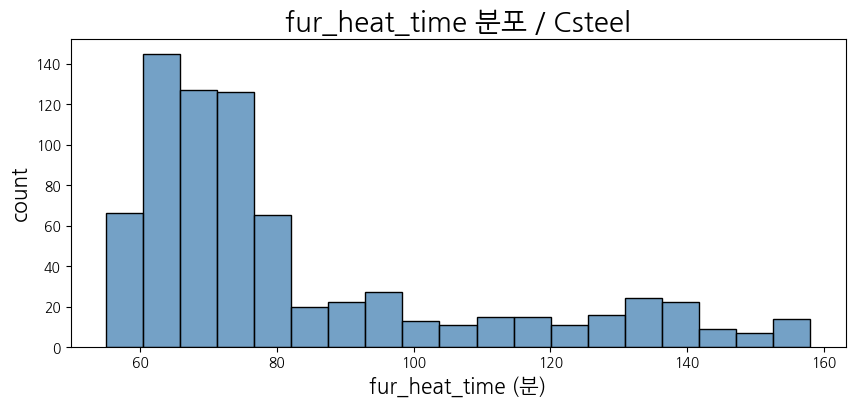

In [108]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['fur_heat_time'], color='steelblue')

plt.title('fur_heat_time 분포 / Csteel', fontsize=20)
plt.xlabel('fur_heat_time (분)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

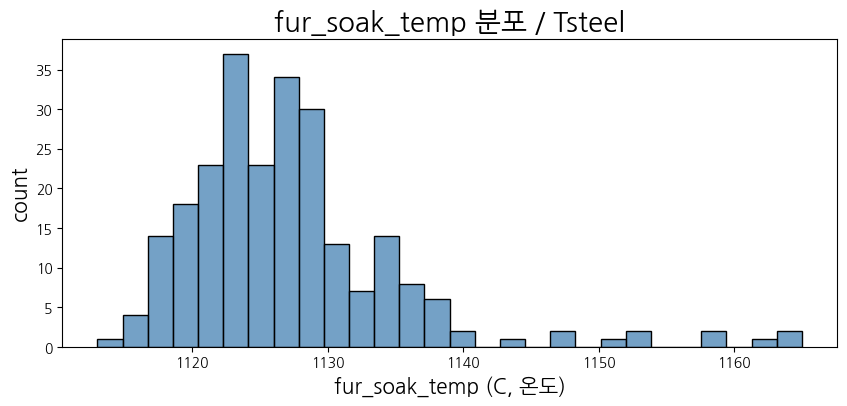

In [109]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['fur_soak_temp'], color='steelblue')

plt.title('fur_soak_temp 분포 / Tsteel', fontsize=20)
plt.xlabel('fur_soak_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

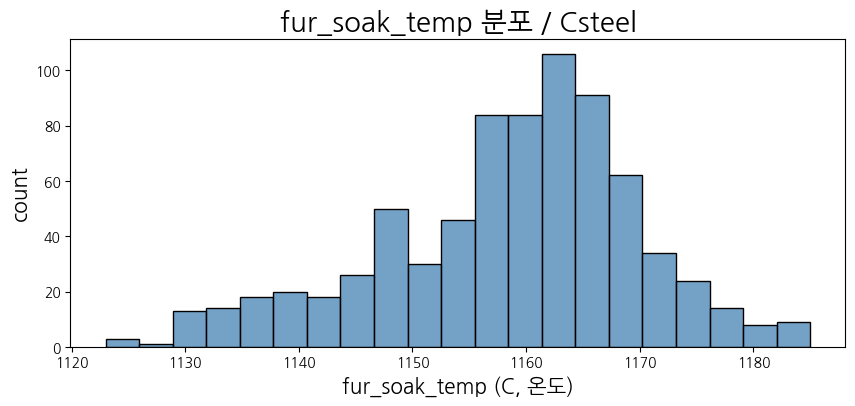

In [110]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['fur_soak_temp'], color='steelblue')

plt.title('fur_soak_temp 분포 / Csteel', fontsize=20)
plt.xlabel('fur_soak_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

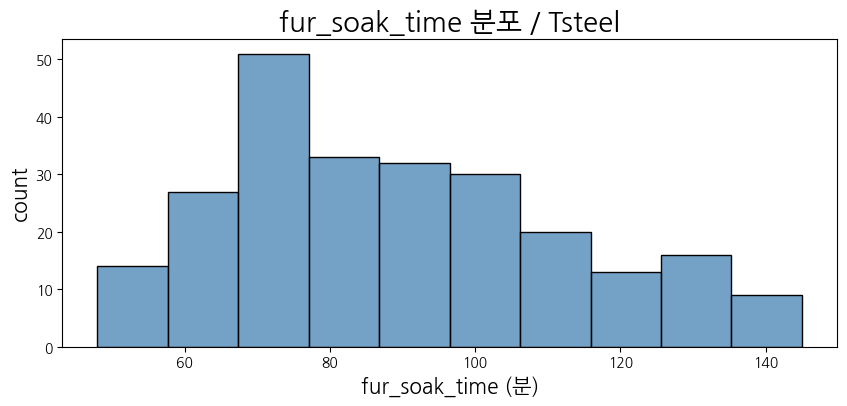

In [111]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['fur_soak_time'], color='steelblue')

plt.title('fur_soak_time 분포 / Tsteel', fontsize=20)
plt.xlabel('fur_soak_time (분)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

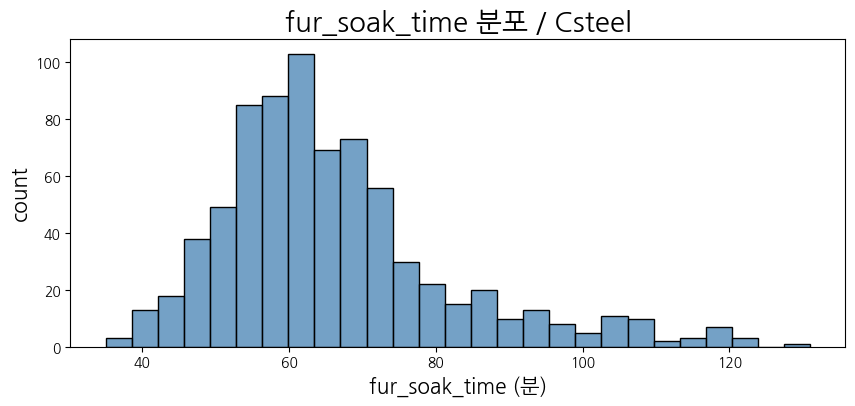

In [112]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['fur_soak_time'], color='steelblue')

plt.title('fur_soak_time 분포 / Csteel', fontsize=20)
plt.xlabel('fur_soak_time (분)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

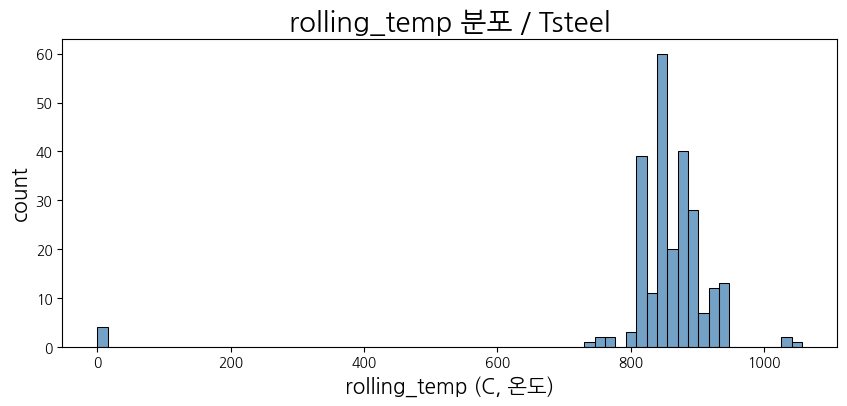

In [113]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['rolling_temp'], color='steelblue')

plt.title('rolling_temp 분포 / Tsteel', fontsize=20)
plt.xlabel('rolling_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

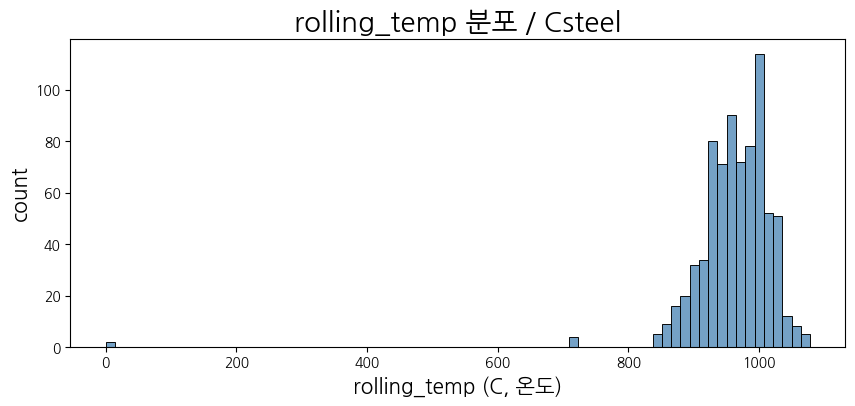

In [114]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['rolling_temp'], color='steelblue')

plt.title('rolling_temp 분포 / Csteel', fontsize=20)
plt.xlabel('rolling_temp (C, 온도)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

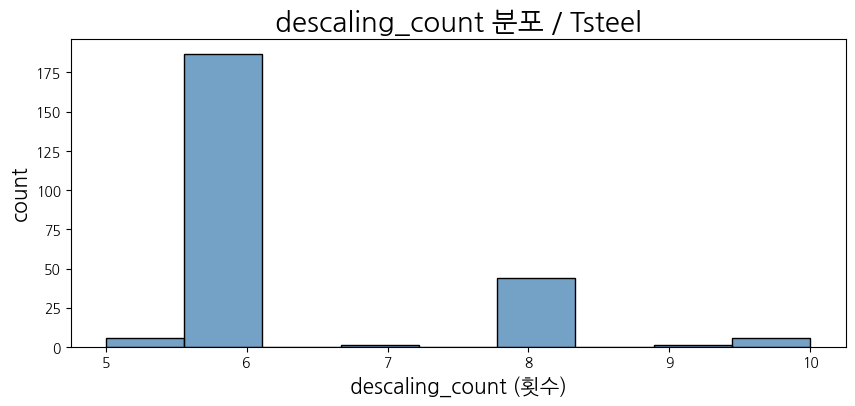

In [115]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['descaling_count'], color='steelblue')

plt.title('descaling_count 분포 / Tsteel', fontsize=20)
plt.xlabel('descaling_count (횟수)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

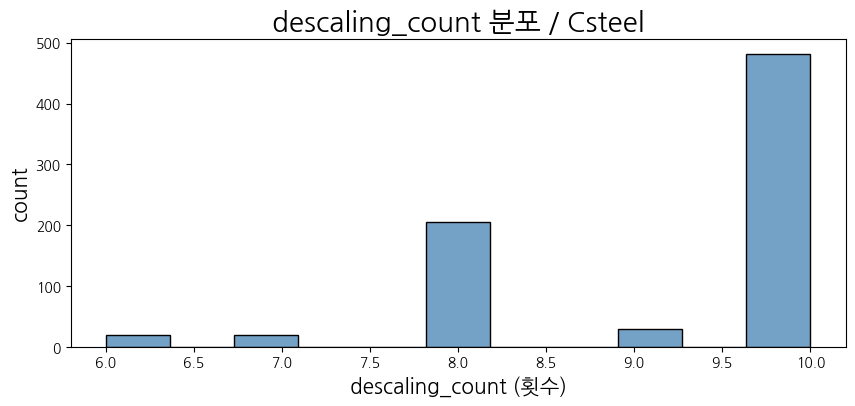

In [116]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Csteel['descaling_count'], color='steelblue')

plt.title('descaling_count 분포 / Csteel', fontsize=20)
plt.xlabel('descaling_count (횟수)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

In [117]:
df_Tsteel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 622
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         245 non-null    object
 1   rolling_date     245 non-null    object
 2   scale            245 non-null    object
 3   spec_long        245 non-null    object
 4   spec_country     245 non-null    object
 5   steel_kind       245 non-null    object
 6   pt_thick         245 non-null    int64 
 7   pt_width         245 non-null    int64 
 8   pt_length        245 non-null    int64 
 9   hsb              245 non-null    object
 10  fur_no           245 non-null    object
 11  fur_input_row    245 non-null    object
 12  fur_heat_temp    245 non-null    int64 
 13  fur_heat_time    245 non-null    int64 
 14  fur_soak_temp    245 non-null    int64 
 15  fur_soak_time    245 non-null    int64 
 16  fur_total_time   245 non-null    int64 
 17  fur_ex_temp      245 non-null    in

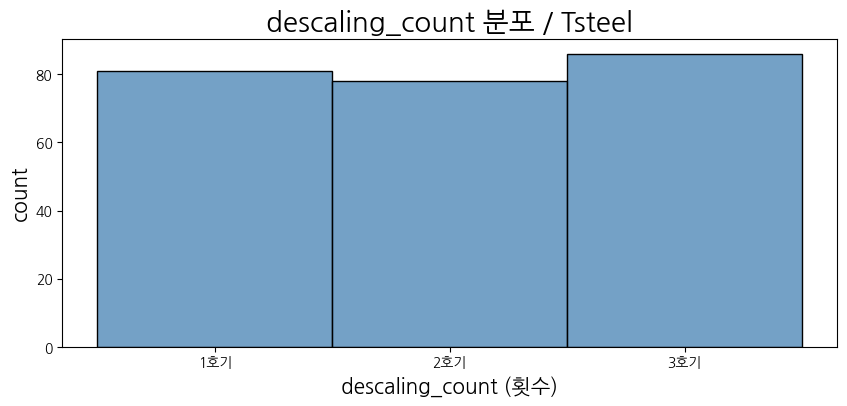

In [118]:
plt.figure(figsize=(10, 4))

sns.histplot(df_Tsteel['fur_no'], color='steelblue')

plt.title('descaling_count 분포 / Tsteel', fontsize=20)
plt.xlabel('descaling_count (횟수)', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.show()

In [119]:
df_Tsteel = pd.read_csv("/home/piai/Downloads/df_Tsteel.csv")
df_Csteel = pd.read_csv("/home/piai/Downloads/df_Csteel.csv")

In [120]:
df_Csteel['work_group'].value_counts()

4조    210
1조    207
2조    171
3조    167
Name: work_group, dtype: int64

In [121]:
df_Tsteel['work_group'].value_counts()

2조    121
1조     73
3조     51
Name: work_group, dtype: int64

In [122]:
df_Tsteel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rolling_date     245 non-null    object 
 1   scale            245 non-null    int64  
 2   pt_thick         245 non-null    int64  
 3   hsb              245 non-null    int64  
 4   fur_input_row    245 non-null    object 
 5   fur_heat_temp    245 non-null    int64  
 6   fur_heat_time    245 non-null    int64  
 7   fur_soak_temp    245 non-null    int64  
 8   fur_soak_time    245 non-null    int64  
 9   rolling_method   245 non-null    object 
 10  rolling_temp     245 non-null    float64
 11  descaling_count  245 non-null    int64  
 12  work_group       245 non-null    object 
 13  fur_pre_time     245 non-null    int64  
 14  pt_area          245 non-null    float64
dtypes: float64(2), int64(9), object(4)
memory usage: 28.8+ KB


In [123]:
df_raw = pd.read_csv("/home/piai/data/2. Big Data 분석/SCALE불량.csv", encoding= 'euc-kr')

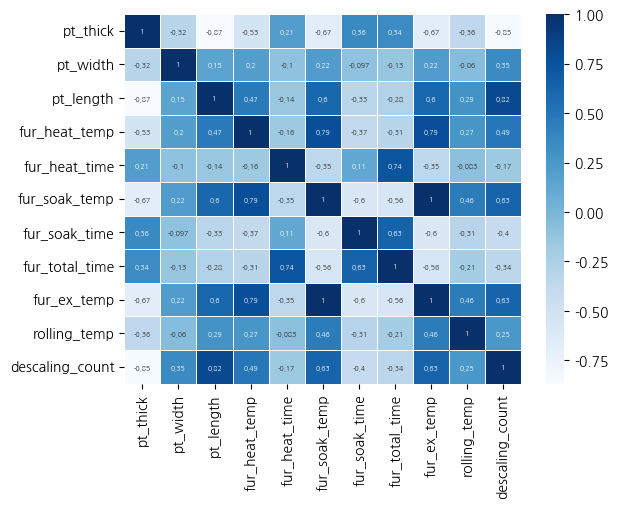

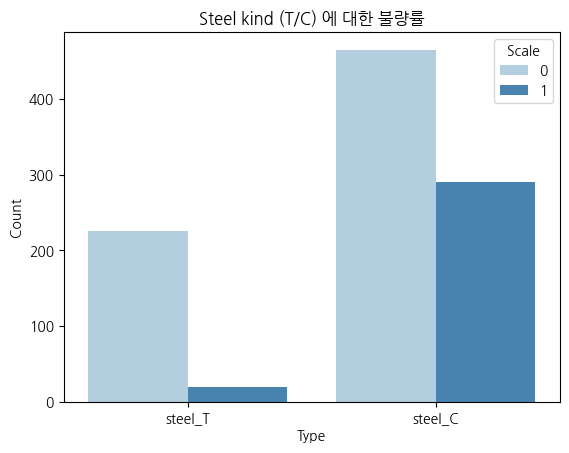

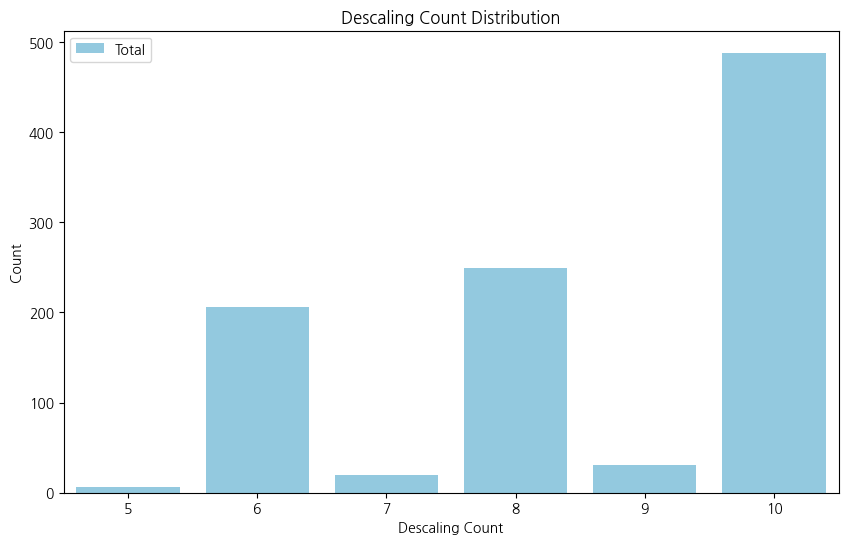

In [124]:
sns.heatmap(df_raw.corr(), cmap='Blues', cbar=True, annot=True, linewidths=0.5,
            annot_kws={'size': 5})
# 각 데이터 프레임에서 scale 값의 개수 계산
count_T = df_Tsteel['scale'].value_counts().sort_index()
count_C = df_Csteel['scale'].value_counts().sort_index()
# 계산된 개수를 기반으로 데이터 프레임 생성
df_counts = pd.DataFrame({'steel_T': count_T, 'steel_C': count_C}).fillna(0)
# 데이터 프레임의 인덱스 리셋 및 멜트(melt)하여 긴 형태로 변환
df_counts = df_counts.reset_index().melt(id_vars='index', value_vars=['steel_T', 'steel_C'])
colors = ['#191c4cff', '#3a3f4bff']
# 그래프 그리기
fig, ax = plt.subplots()
sns.barplot(data=df_counts, x='variable', y='value', hue='index', ax=ax, palette='Blues')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Steel kind (T/C) 에 대한 불량률')
ax.legend(title='Scale')
plt.show()
plt.figure(figsize=(10, 6))
# 전체 descaling_count에 대한 countplot
sns.countplot(x='descaling_count', data=df, color="skyblue", label="Total")
# scale이 1인 데이터만 필터링
df_scale_1 = df[df['scale'] == 1]
# scale이 1인 데이터에 대한 countplot을 같은 축(ax)에 덧그림
sns.countplot(x='descaling_count', data=df_scale_1, color="grey", label="Scale = 1")
# 범례 추가
plt.title('Descaling Count Distribution')
plt.xlabel('Descaling Count')
plt.ylabel('Count')
plt.show()